# 疑似相関の確認

In [1]:
import random
import numpy as np

random.seed(1234)
np.random.seed(1234)

In [3]:
import scipy.stats

from numpy.random import randn
import matplotlib.pyplot as plt
%matplotlib inline

## ZからYへ因果が存在する場合

変数Z&rarr;変数Y

In [6]:
# ノイズを生成
num_data = 200
e_z = randn(num_data)
e_y = randn(num_data)

# データの生成
Z = e_z
Y = 2*Z + e_y   #ここにZの値が影響している＝＞相関がある

# ZとYの相関関係を求める
np.corrcoef(Z, Y)

array([[1.       , 0.8599333],
       [0.8599333, 1.       ]])

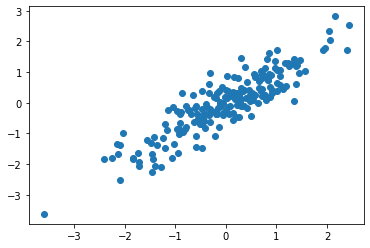

In [5]:
# 標準化
Z_std = scipy.stats.zscore(Z)
Y_std = scipy.stats.zscore(Y)

# 散布図を描画
plt.scatter(Z_std,Y_std)

## 疑似相関：因果が逆

In [7]:
# ノイズを生成
num_data = 200
e_z = randn(num_data)
e_y = randn(num_data)

# データの生成
Y = e_y
Z = 2*Y + e_z   #ここにZの値が影響している＝＞相関がある

# ZとYの相関関係を求める
np.corrcoef(Z, Y)

array([[1.        , 0.90116266],
       [0.90116266, 1.        ]])

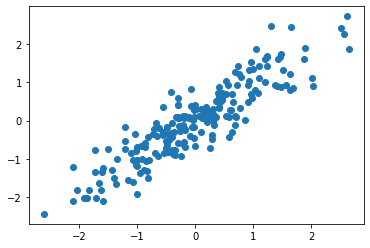

In [8]:
# 標準化
Z_std = scipy.stats.zscore(Z)
Y_std = scipy.stats.zscore(Y)

# 散布図を描画
plt.scatter(Z_std,Y_std)

横軸：Z、縦軸：Y  
**因果関係が逆でも相関係数が大きい場合があり**、**データの見た目からは因果関係の向きを読み取れない**

## 疑似相関：共通の原因